In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
hierarchy=pd.read_csv('company_hierarchy.csv.txt')
hierarchy.head()

,employee_id,boss_id,dept
0,46456,175361.0,sales
1,104708,29733.0,HR
2,120853,41991.0,sales
3,142630,171266.0,HR
4,72711,198240.0,sales


In [4]:
employee=pd.read_csv('employee.csv.txt')
employee.head()

,employee_id,signing_bonus,salary,degree_level,sex,yrs_experience
0,138719,0,273000.0,Master,M,2
1,3192,0,301000.0,Bachelor,F,1
2,114657,0,261000.0,Master,F,2
3,29039,0,86000.0,High_School,F,4
4,118607,0,126000.0,Bachelor,F,3


In [149]:
df=pd.merge(hierarchy,employee,on='employee_id')
df.head()

,employee_id,boss_id,dept,signing_bonus,salary,degree_level,sex,yrs_experience
0,46456,175361.0,sales,0,213000.0,Bachelor,M,5
1,104708,29733.0,HR,0,79000.0,Bachelor,F,3
2,120853,41991.0,sales,0,199000.0,High_School,M,5
3,142630,171266.0,HR,0,143000.0,PhD,F,13
4,72711,198240.0,sales,0,235000.0,Master,M,1


### Question 1

In the company there are 6 levels (described below). Identify, for each employee, her corresponding level.

Individual Contributors (IC) - they don't manage anyone

Middle Managers (MM) - they are the direct bosses of IC

Directors (D) - they are the direct bosses of MM

VP - D direct bosses

Executives (E) - VP direct bosses

CEO - The direct boss of E.

In [150]:
df['dept'].unique()

array(['sales', 'HR', 'engineering', 'marketing', 'CEO'], dtype=object)

In [151]:
levels=['CEO','E','VP','D','MM','IC']

#Starting point
df.loc[df['dept']=='CEO','level']='CEO'


def assign_level(df):
    for i in range(len(levels)-1):
        boss_level=levels[i]
        employee_level=levels[i+1]
        boss_id=df[df['level']==boss_level].employee_id
        df.loc[df['boss_id'].isin(boss_id),'level']= employee_level
    return df

        
            

In [152]:
assign_level(df)

,employee_id,boss_id,dept,signing_bonus,salary,degree_level,sex,yrs_experience,level
0,46456,175361.0,sales,0,213000.0,Bachelor,M,5,IC
1,104708,29733.0,HR,0,79000.0,Bachelor,F,3,IC
2,120853,41991.0,sales,0,199000.0,High_School,M,5,IC
3,142630,171266.0,HR,0,143000.0,PhD,F,13,MM
4,72711,198240.0,sales,0,235000.0,Master,M,1,IC
5,61704,53109.0,sales,0,196000.0,High_School,M,3,IC
6,153072,67178.0,HR,0,99000.0,PhD,M,3,IC
7,58903,150290.0,HR,1,78000.0,PhD,M,5,IC
8,166034,116750.0,engineering,1,379000.0,Master,M,6,IC
9,54819,182038.0,sales,0,249000.0,Master,F,6,IC


In [153]:
df.level.value_counts()

IC     9000
MM      800
D       160
VP       35
E         4
CEO       1
Name: level, dtype: int64

### Question 2 

How many people each employee manages? You should have a table with employee ids and the number of people managed. Consider that if John directly manages 2 people and these two people manage 5 people each, then we conclude that John manages 12 people.

In [154]:
#Starting point 
df['count']=0
levels=['IC','MM','D',"VP",'E',"CEO"]
for level in levels:
    boss_ids= df[df['level']==level]['boss_id']
    employee_ids = df[df['level'] == level]['employee_id']
    
    for boss,emp in zip(boss_ids,employee_ids):
        e_counts = int(1 + df.loc[df['employee_id'] == emp, 'count'])
        b_counts = df.loc[df['employee_id'] == boss, 'count']
        df.loc[df['employee_id'] == boss, 'count'] = e_counts + b_counts
    


In [159]:
df[['employee_id', 'level', 'count']].head()

,employee_id,level,count
0,46456,IC,0
1,104708,IC,0
2,120853,IC,0
3,142630,MM,16
4,72711,IC,0


### Question 3 

Build a Predictive model

In [73]:
data=df.copy()
data=data.drop(['employee_id','boss_id','Number_of_people'],axis=1)

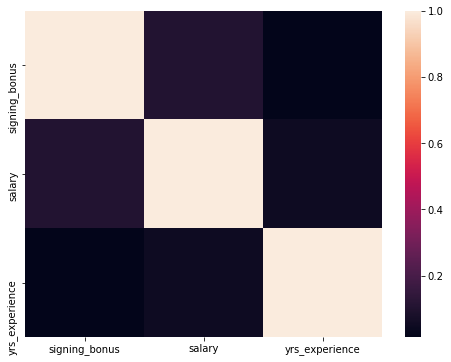

In [43]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 6))
#subset = data[['signing_bonus', 'yrs_experience', 'counts', 'salary']]
sns.heatmap(data.corr(), ax=ax)
plt.show()

We can keep all the features as they aren't correlated amongst themselves

### Preparing the features

In [74]:
#Remove the data point for the CEO as it is an outlier and we do not want it to affect the entire dataset
data= data[data['dept'] != 'CEO']
del(data['level'])


In [63]:
data.head()

,dept,signing_bonus,salary,degree_level,sex,yrs_experience
0,sales,0,213000.0,Bachelor,M,5
1,HR,0,79000.0,Bachelor,F,3
2,sales,0,199000.0,High_School,M,5
3,HR,0,143000.0,PhD,F,13
4,sales,0,235000.0,Master,M,1


In [75]:
#OHE on dept
dummies=pd.get_dummies(data['dept'],prefix='dept',drop_first=True)
data=pd.concat([data,dummies],axis=1)

del(data['dept']) #dropping the orginal dept column

In [77]:
# Label encoding for degree_level

#Since the scikit learn label encoder does not let us specify our own order, I am not using that. 
data['degree_level'] = df['degree_level'].apply(lambda x: ['High_School', 'Bachelor', 'Master', 'PhD'].index(x))

In [82]:
#Encoding the sex variable
data['is_male']=(data['sex']=='M').astype(int)
del(data['sex'])

Since, we'd be using regression and the number of samples in the training data are not very high, it's important to check if the dependent variable follows a normal distribution or not.

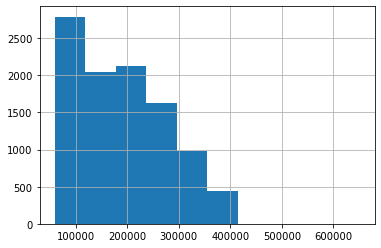

In [88]:
data['salary'].hist()

The data is highly skewed so we need to tranform it.

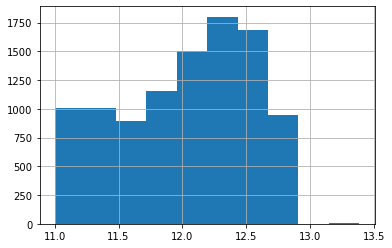

In [89]:
import numpy as np
data['salary']=np.log(data['salary'])
data['salary'].hist()

In [92]:
X=data.loc[:,data.columns!='salary']
Y=data['salary']


In [99]:
#Train and test data
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

### Parameter Tuning

In [101]:
n_estimators=[100,500,800]
max_features=['auto']
max_Depth=[None,10,20]
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,5,10]

grid_param={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_Depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}


In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
RFR= RandomForestRegressor(random_state=0)
RFR_random=RandomizedSearchCV(estimator=RFR,param_distributions=grid_param,cv=5, random_state=42)

In [103]:
RFR_random.fit(X_train,Y_train)
print(RFR_random.best_params_)

{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 10}


In [104]:
#Fitting with best parameters

RFR= RandomForestRegressor(n_estimators=500,min_samples_split=5,min_samples_leaf=10,max_features='auto',max_depth=10,random_state=42)
RFR.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [106]:
y_pred=RFR.predict(x_test)

In [115]:
from sklearn.metrics import mean_squared_error
print('Test RMSE:\t', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Test R2:\t', r2_score(y_test, (y_pred)))

Test RMSE:	 0.4038734945288393
Test R2:	 0.3924999157912933


In [120]:
features = list(X_train.columns)
importances = list(RFR.feature_importances_)
feature_importances_df = pd.DataFrame({'feature' : features, 'importance' : importances})
feature_importances_df = feature_importances_df.sort_values(by = 'importance', ascending=False)
feature_importances_df = feature_importances_df.iloc[0:10,:].sort_values(by = 'importance', ascending=True)

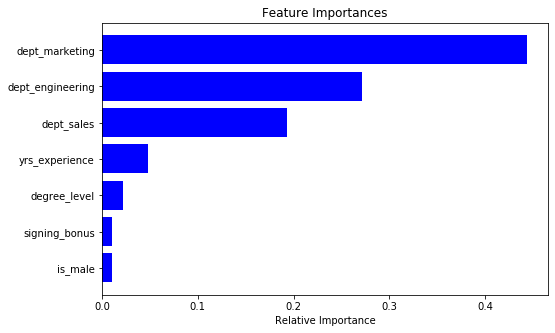

In [126]:
plt.figure(figsize=(8, 5))
plt.title('Feature Importances')
plt.barh(range(0,7), feature_importances_df['importance'], color='blue', align='center')
plt.yticks(range(0,7), [i for i in feature_importances_df.feature[0:10]])
plt.xlabel('Relative Importance')
plt.show()

From the random forest, we can see that the most important features that determine the salary are the department and then the years of experience a person has. Also, looks like the gender explains the least variance in the model which is good as it indicates that there isn't a direct bias towards any gender. However, it's important to analyze the departments well and see if there is any underlying bias present.

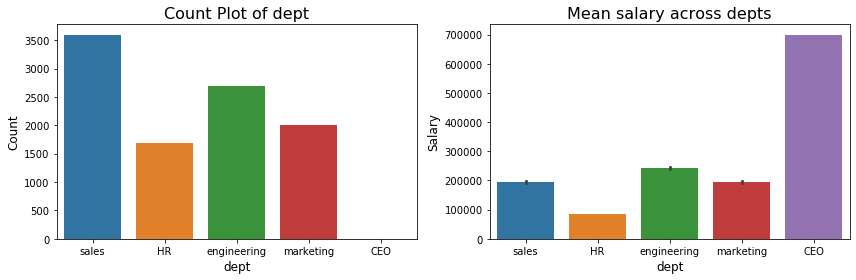

In [128]:
#dept vs salary

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x='dept', data=df, ax=ax[0])
ax[0].set_xlabel('dept', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of dept', fontsize=16)

sns.barplot(x='dept', y='salary', data=df, ax=ax[1])
ax[1].set_xlabel('dept', fontsize=12)
ax[1].set_ylabel('Salary', fontsize=12)
ax[1].set_title('Mean salary across depts', fontsize=16)
plt.tight_layout()
plt.show()

We can observe that after the CEO (obviously), the highest paying departments are the engineering,marketing and the sales department. It would be interesting to look the distribution of males and females across departments.

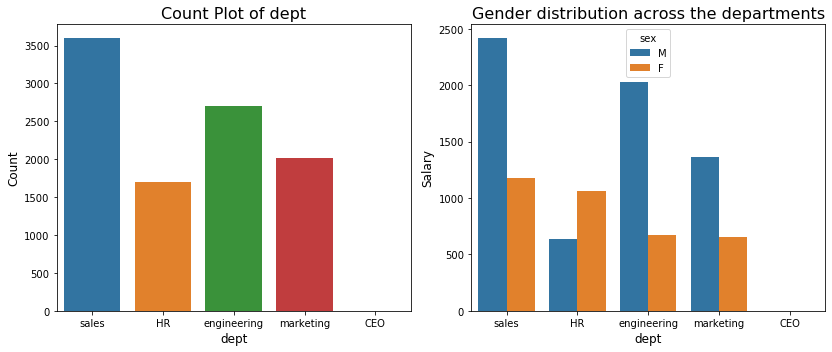

In [129]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(x='dept', data=df, ax=ax[0])
ax[0].set_xlabel('dept', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of dept', fontsize=16)

sns.countplot(x='dept', data=df, hue = 'sex', ax=ax[1])
ax[1].set_xlabel('dept', fontsize=12)
ax[1].set_ylabel('Salary', fontsize=12)
ax[1].set_title('Gender distribution across the departments', fontsize=16)
plt.tight_layout()
plt.show()


After looking at these plots, we can see an interesting trend that the ratio of male employees to female employees is higher in the high paying departments like engineering and marketing. The only department where women are hired more than men in this company is the HR department which is the lowest paid department.

Now, lets find the bias which is the difference in the true and predicted salary and see the trend of bias.

In [132]:
salary_df = pd.DataFrame({'true_salary' :  y_test , 'predicted_salary' : y_pred, 'bias' :y_test - y_pred})

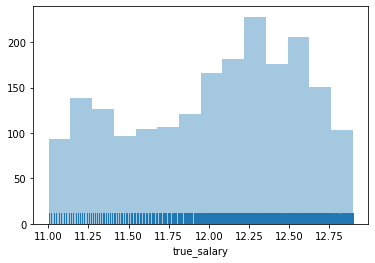

In [133]:
sns.distplot(salary_df['true_salary'],  kde=False, rug=True)

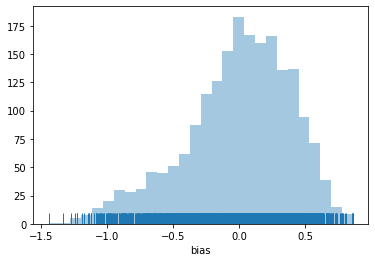

In [134]:
sns.distplot(salary_df['bias'],  kde=False, rug=True)

Bias(of predicted values)  is almost normally distributed 

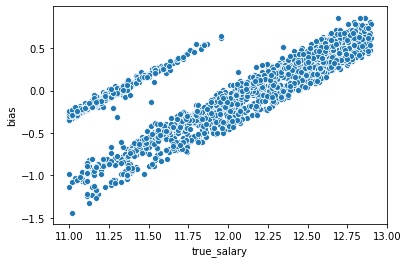

In [135]:

ax = sns.scatterplot(x='true_salary', y='bias', data=salary_df)

This plot indicates that the bias increases with an increase in salary. In other words, it means that people with higher salaries are being overpaid. 

Key takeaways:
- The company treats its employees fairly. However, there's a bias in representation of females across all the departments. 
- The HR should consider hiring more women in the engineering and marketing departments and more men in HR to increase diversity.
- Also, since people with higher salaries are bein overpaid, it might help to lower down their salaries to increase fairness in the workforce.